**Métricas de polaridad y subjetividad**  
Para comenzar nuestro viaje, veamos la oferta de TextBlob. Con TextBlob, obtenemos una métrica de polaridad y subjetividad. La polaridad es el sentimiento mismo, que va de -1 a +1. La subjetividad es una medida del sentimiento siendo objetivo a subjetivo, y va de 0 a 1. Preferimos ver el sentimiento que es objetivo que subjetivo, así que una puntuación más baja probablemente denote una lectura más precisa. Ya veremos.

## Dependencies

In [8]:
import numpy as np
import pandas as pd

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
# Adding pipeline
nlp.add_pipe('spacytextblob')


import neattext.functions as nfx

In [3]:
df = pd.read_csv('Sentiment Analysis Dataset.csv')

In [4]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [5]:
df.shape

(1048575, 3)

In [6]:
df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

### data Cleaning

In [7]:
df['SentimentText'].head()

0                         is so sad for my APL frie...
1                       I missed the New Moon trail...
2                              omg its already 7:30 :O
3              .. Omgaga. Im sooo  im gunna CRy. I'...
4             i think mi bf is cheating on me!!!   ...
Name: SentimentText, dtype: object

In [9]:
df['text_clean'] = df['SentimentText'].apply(nfx.remove_shortwords)

In [10]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_puncts)

In [11]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_special_characters)

In [13]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_hashtags)

In [14]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_numbers)

In [15]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_punctuations)

In [18]:
df[['SentimentText', 'text_clean']]

,SentimentText,text_clean
0,is so sad for my APL frie...,friend
1,I missed the New Moon trail...,missed Moon trailer
2,omg its already 7:30 :O,already
3,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga sooo gunna been this dentist since supo...
4,i think mi bf is cheating on me!!! ...,think cheating
...,...,...
1048570,Missing my fiancee sooo badly!!! I love you b...,Missing fiancee sooo badly love baybay
1048571,missing my friend,missing friend
1048572,Missing my friend and my cousin. Two months pa...,Missing friend cousin months passed quickly
1048573,missing my friends!,missing friends


In [24]:
text= 'Missing friend cousin months passed quickly'

In [25]:
docx = nlp(text)

In [26]:
docx._.polarity

0.06666666666666665

In [27]:
docx._.subjectivity

0.275

In [40]:
from textblob import TextBlob

In [41]:
df['polarity'] = df['text_clean'].apply(lambda x: TextBlob(x).sentiment[0])

In [42]:
df['Subjectivity'] = df['text_clean'].apply(lambda x: TextBlob(x).sentiment[1])

In [59]:
df.head()

,ItemID,Sentiment,SentimentText,text_clean,polarity,Subjectivity
0,1,0,is so sad for my APL frie...,friend,0.0,0.0
1,2,0,I missed the New Moon trail...,missed Moon trailer,0.0,0.0
2,3,1,omg its already 7:30 :O,already,0.0,0.0
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga sooo gunna been this dentist since supo...,0.0,0.0
4,5,0,i think mi bf is cheating on me!!! ...,think cheating,0.0,0.0


In [69]:
# get sentiment
def get_sentiment(polarity):
    if polarity >0:
        sent_label = 'Positive'
    elif polarity <0:
        sent_label ='Negative'
    else:
        sent_label='Neutral'
    return sent_label

In [70]:
df['sentiment_label'] = df['polarity'].apply(lambda x: get_sentiment(x))

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

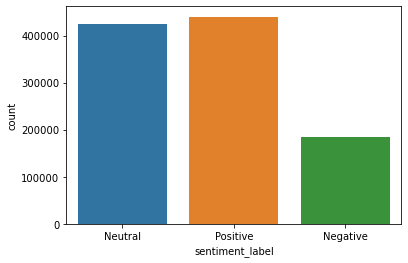

In [71]:
sns.countplot(data = df, x = 'sentiment_label')
plt.show()

In [72]:
df['sentiment_label'].value_counts()

Positive    439947
Neutral     424771
Negative    183857
Name: sentiment_label, dtype: int64

In [73]:
df['sentiment_label'].value_counts(normalize =True)*100

Positive    41.956655
Neutral     40.509358
Negative    17.533987
Name: sentiment_label, dtype: float64

In [79]:
df[df['sentiment_label']=='Positive']['SentimentText']

5                          or i just worry too much?        
10                             I must think about positive..
11               thanks to all the haters up in my face a...
13                    jb isnt showing in australia any more!
15             &lt;-------- This is the way i feel right ...
                                 ...                        
1048548              Missing my bundle of brilliant fun.... 
1048556    missing my daddio and laughing with him. i get...
1048563    Missing my dearest love so much!  learning for...
1048570    Missing my fiancee sooo badly!!!  I love you b...
1048572    Missing my friend and my cousin. Two months pa...
Name: SentimentText, Length: 439947, dtype: object

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

In [83]:
analizador = SentimentIntensityAnalyzer()

In [ ]:
for sentences in df['text_clean']:
    #print(sentences)
    scores = analizador.polarity_scores(sentences)
    for key in scores:
        print(key , ':' , scores[key])
        print()

neg : 0.0

neu : 0.0

pos : 1.0

compound : 0.4939

neg : 0.524

neu : 0.476

pos : 0.0

compound : -0.296

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.783

neu : 0.217

pos : 0.0

compound : -0.5574

neg : 0.592

neu : 0.408

pos : 0.0

compound : -0.4404

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.588

pos : 0.412

compound : 0.4215

neg : 0.286

neu : 0.714

pos : 0.0

compound : -0.1531

neg : 0.0

neu : 0.606

pos : 0.394

compound : 0.0772

neg : 0.0

neu : 0.455

pos : 0.545

compound : 0.5574

neg : 0.451

neu : 0.141

pos : 0.408

compound : -0.0772

neg : 0.6

neu : 0.4

pos : 0.0

compound : -0.4588

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.252

neu : 0.489

pos : 0.259

compound : 0.022

neg : 0.167

neu : 0.303

pos : 0.53

compound : 0.5859

neg : 0.347

neu : 0.325

pos : 0

neg : 0.0

neu : 0.625

pos : 0.375

compound : 0.6369

neg : 0.0

neu : 0.61

pos : 0.39

compound : 0.4939

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.284

pos : 0.716

compound : 0.8779

neg : 0.108

neu : 0.633

pos : 0.259

compound : 0.5267

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.674

neu : 0.0

pos : 0.326

compound : -0.3818

neg : 0.423

neu : 0.163

pos : 0.415

compound : -0.0258

neg : 0.0

neu : 0.192

pos : 0.808

compound : 0.6369

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.145

neu : 0.855

pos : 0.0

compound : -0.296

neg : 0.583

neu : 0.417

pos : 0.0

compound : -0.1027

neg : 0.0

neu : 0.256

pos : 0.744

compound : 0.7003

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.435

pos : 0.565

compound : 0.0772

neg : 0.132

neu : 0.495

pos : 0.374

compound : 0.6037

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.927

pos

neg : 0.0

neu : 0.843

pos : 0.157

compound : 0.0772

neg : 0.175

neu : 0.825

pos : 0.0

compound : -0.1779

neg : 0.0

neu : 0.589

pos : 0.411

compound : 0.4201

neg : 0.128

neu : 0.615

pos : 0.257

compound : 0.3182

neg : 0.714

neu : 0.286

pos : 0.0

compound : -0.3612

neg : 0.0

neu : 0.508

pos : 0.492

compound : 0.4404

neg : 0.295

neu : 0.476

pos : 0.229

compound : -0.1779

neg : 0.535

neu : 0.465

pos : 0.0

compound : -0.3182

neg : 0.355

neu : 0.645

pos : 0.0

compound : -0.296

neg : 0.0

neu : 0.492

pos : 0.508

compound : 0.7351

neg : 1.0

neu : 0.0

pos : 0.0

compound : -0.5106

neg : 0.0

neu : 0.118

pos : 0.882

compound : 0.8176

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.377

neu : 0.623

pos : 0.0

compound : -0.6408

neg : 0.35

neu : 0.65

pos : 0.0

compound : -0.6486

neg : 0.41

neu

neu : 0.471

pos : 0.247

compound : -0.0772

neg : 0.416

neu : 0.442

pos : 0.141

compound : -0.6096

neg : 0.0

neu : 0.768

pos : 0.232

compound : 0.1298

neg : 0.31

neu : 0.518

pos : 0.173

compound : -0.3804

neg : 0.0

neu : 0.568

pos : 0.432

compound : 0.5859

neg : 1.0

neu : 0.0

pos : 0.0

compound : -0.2732

neg : 0.0

neu : 0.408

pos : 0.592

compound : 0.4404

neg : 0.0

neu : 0.286

pos : 0.714

compound : 0.3612

neg : 0.0

neu : 0.727

pos : 0.273

compound : 0.4588

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.182

neu : 0.818

pos : 0.0

compound : -0.25

neg : 0.111

neu : 0.452

pos : 0.437

compound : 0.7579

neg : 0.0

neu : 0.448

pos : 0.552

compound : 0.8126

neg : 0.0

neu : 0.707

pos : 0.293

compound : 0.4404

neg : 0.115

neu : 0.651

pos : 0.234

compound : 0.3318

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.274

neu : 0.323

pos : 0.403

compound : 0.1531

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu :

pos : 0.0

compound : 0.0

neg : 0.778

neu : 0.222

pos : 0.0

compound : -0.5423

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.606

pos : 0.394

compound : 0.4404

neg : 0.0

neu : 0.556

pos : 0.444

compound : 0.34

neg : 0.0

neu : 0.374

pos : 0.626

compound : 0.6908

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.648

pos : 0.352

compound : 0.5859

neg : 0.322

neu : 0.678

pos : 0.0

compound : -0.2263

neg : 0.0

neu : 0.659

pos : 0.341

compound : 0.6908

neg : 0.0

neu : 0.775

pos : 0.225

compound : 0.4404

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.107

neu : 0.738

pos : 0.154

compound : 0.1779

neg : 0.0

neu : 0.256

pos : 0.744

compound : 0.4404

neg : 0.0

neu : 0.256

pos : 0.744

compound : 0.7003

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.107

neu : 0.893

pos : 0.0

compound : -0.0516

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.266

neu : 0.734

pos : 0.0

compound : -0.44

pos : 0.583

compound : 0.6808

neg : 0.263

neu : 0.543

pos : 0.194

compound : -0.2247

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.697

neu : 0.303

pos : 0.0

compound : -0.3182

neg : 0.706

neu : 0.294

pos : 0.0

compound : -0.802

neg : 1.0

neu : 0.0

pos : 0.0

compound : -0.5423

neg : 0.467

neu : 0.533

pos : 0.0

compound : -0.5423

neg : 0.872

neu : 0.128

pos : 0.0

compound : -0.7783

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.645

pos : 0.355

compound : 0.765

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.439

neu : 0.152

pos : 0.409

compound : -0.0516

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.326

neu : 0.278

pos : 0.396

compound : 0.25

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.211

neu : 0.602

pos : 0.188

compound : 0.1779

neg : 0.0

neu : 0.679

pos : 0.321

compound : 0.6369

ne

neg : 0.0

neu : 0.807

pos : 0.193

compound : 0.4767

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.702

pos : 0.298

compound : 0.5255

neg : 0.244

neu : 0.56

pos : 0.196

compound : -0.0094

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.813

pos : 0.187

compound : 0.1548

neg : 0.667

neu : 0.333

pos : 0.0

compound : -0.25

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.146

neu : 0.854

pos : 0.0

compound : -0.0516

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.782

pos : 0.218

compound : 0.4201

neg : 0.0

neu : 0.476

pos : 0.524

compound : 0.765

neg : 0.339

neu : 0.323

pos : 0.339

compound : 0.0

neg : 0.294

neu : 0.392

pos : 0.314

compound : 0.0516

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.256

pos : 0.744

compound : 0.4404

neg : 0.155

neu : 0.485

pos : 0.359

compound : 0.4767

neg : 0.0

neu : 0.213

pos : 

neg : 0.0

neu : 0.58

pos : 0.42

compound : 0.4404

neg : 0.732

neu : 0.268

pos : 0.0

compound : -0.802

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.0

neu : 0.811

pos : 0.189

compound : 0.2732

neg : 0.239

neu : 0.761

pos : 0.0

compound : -0.5267

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.246

neu : 0.308

pos : 0.446

compound : 0.3182

neg : 0.0

neu : 1.0

pos : 0.0

compound : 0.0

neg : 0.394

neu : 0.606

pos : 0.0

compound : -0.7783

neg : 0.296

neu : 0.704

pos : 0.0

compound : -0.2732

neg : 0.339

neu : 0.521

pos : 0.141

compound : -0.5859

neg : 0.5

neu : 0.5

pos : 0.0

compound : -0.6124

neg : 1.0

neu : 0.0

pos : 0.0

compound : -0.2732

neg : 0.242

neu : 0.421

pos : 0.337

compound : 0.2263

neg : 0.355

neu : 0.645

pos : 0.0

compound : -0.5423

neg : 0.0

neu : 0.426

pos : 0.574

compound : 0.4019

neg : 0.362

neu : 0.638

pos : 0.0

compound : -0.5267

neg : 0.224

neu : 0.16

pos : 0.616

compound : 0.7096

neg : 0.